<a href="https://colab.research.google.com/github/Aatika1/openai-API/blob/main/edges_nodes_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
%%capture --no-stderr
%pip install --quiet -U langgraph

In [20]:
#define state
from typing_extensions import TypedDict

class LearningState(TypedDict):
  prompt:str

In [21]:
# prompt: create an example from above LearningState

abu_state:LearningState =LearningState(prompt= "Hi this abuzar ")

In [23]:
# print(abu_state)
# print(abu_state['prompt'])
print(abu_state['prompt'] + " I am")
print(type(abu_state))

Hi this abuzar I am
<class 'dict'>


In [36]:
#Nodes are just py functions
def node1(state:LearningState)->LearningState:
  print("Node_1 State",state)
  return{"prompt":state['prompt'] + " I am"}

def node2(state:LearningState)->LearningState:
  print("Node_2",state)
  return{"prompt":state["prompt"]+" Abuzar "}

def node3(state:LearningState)->LearningState:
  print("Node_3",state)
  return{"prompt": state["prompt"]+" I am learning Agentic AI from PIAIC"}


In [38]:
#edges connect to nodes and graph construct

from IPython.display import Image, display # Preview Graph

from langgraph.graph import StateGraph,START,END
from langgraph.graph.state import CompiledStateGraph # type

builder:StateGraph=StateGraph(state_schema=LearningState)

In [39]:
print(type(builder))

<class 'langgraph.graph.state.StateGraph'>


In [40]:
# Nodes
builder.add_node("node1",node1)
builder.add_node("node2",node2)
builder.add_node("node3",node3)

In [41]:
# edges logic
builder.add_edge(START,"node1")
builder.add_edge("node1","node2")
builder.add_edge("node2","node3")
builder.add_edge("node3",END)

In [42]:
graph:CompiledStateGraph=builder.compile()

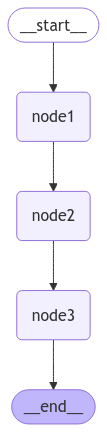

In [43]:
# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [44]:
#Graph Invocation
graph.invoke({"prompt":"hi"})

Node_1 State {'prompt': 'hi'}
Node_2 {'prompt': 'hi I am'}
Node_3 {'prompt': 'hi I am Abuzar '}


{'prompt': 'hi I am Abuzar  I am learning Agentic AI from PIAIC'}